In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data=pd.read_csv("train.csv")

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data=np.array(data)
m,n=data.shape
print(m,n)

42000 785


In [5]:
data
np.random.shuffle(data)

In [6]:
data=data.T
print(data.shape)

(785, 42000)


In [7]:
data

array([[3, 8, 6, ..., 9, 5, 2],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [8]:
y=data[0]
print(y)

[3 8 6 ... 9 5 2]


In [9]:
print(m,n)
x=data[1:]
x=x/255.

42000 785


In [10]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
def init():
    W1=np.random.rand(10,784)-0.5
    b1=np.random.rand(10,1)-0.5
    W2=np.random.rand(10,10)-0.5
    b2=np.random.rand(10,1)-0.5
    return W1,b1,W2,b2
def ReLu(Z):
    return np.maximum(Z,0)
def SoftMax(Z):
    v=np.exp(Z) / sum(np.exp(Z))
    return v
def ReLu_deriv(Z):
    return Z>0
def forward_propagation(x,W1,b1,W2,b2):
    Z1=W1.dot(x)+b1
    A1=ReLu(Z1)
    Z2=W2.dot(A1)+b2
    A2=SoftMax(Z2)
    return Z1,Z2,A1,A2
def one_hot(Y):
    one_hot_Y=np.zeros((Y.size,Y.max()+1))
    one_hot_Y[np.arange(Y.size),Y]=1
    return one_hot_Y.T
def backward_propagation(x,y,W1,W2,A1,A2,b1,b2,Z1,Z2):
    dz2=A2-one_hot(y)
    dw2=1/m * dz2.dot(A1.T)
    db2=1/m * np.sum(dz2)
    dz1=W2.T.dot(dz2)*ReLu_deriv(Z1)
    dw1=1/m * dz1.dot(x.T)
    db1=1/m * np.sum(dz1)
    return dw1,dw2,db1,db2

def parameters_update(dw1,dw2,db1,db2,W1,b1,W2,b2,alpha):
    W1=W1-alpha*dw1
    W2=W2-alpha*dw2
    b1=b1-alpha*db1
    b2=b2-alpha*db2
    return W1,b1,W2,b2


In [12]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size
def gradient_descent(x,y,alpha,epochs):
    W1,b1,W2,b2=init()
    for i in range(epochs):
        Z1,Z2,A1,A2=forward_propagation(x,W1,b1,W2,b2)
        dw1,dw2,db1,db2=backward_propagation(x,y,W1,W2,A1,A2,b1,b2,Z1,Z2)
        W1,b1,W2,b2=parameters_update(dw1,dw2,db1,db2,W1,b1,W2,b2,alpha)
        if i % 50 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, y))
    return W1, b1, W2, b2
        
    
    

In [13]:
W1, b1, W2, b2 = gradient_descent(x, y, 0.10, 800)

Iteration:  0
[2 9 2 ... 2 9 3] [3 8 6 ... 9 5 2]
0.11211904761904762
Iteration:  50
[3 8 6 ... 9 8 1] [3 8 6 ... 9 5 2]
0.559404761904762
Iteration:  100
[3 9 6 ... 9 8 1] [3 8 6 ... 9 5 2]
0.7163333333333334
Iteration:  150
[3 9 6 ... 9 5 1] [3 8 6 ... 9 5 2]
0.7738809523809523
Iteration:  200
[3 9 6 ... 9 5 1] [3 8 6 ... 9 5 2]
0.8028571428571428
Iteration:  250
[3 9 6 ... 9 5 1] [3 8 6 ... 9 5 2]
0.8225476190476191
Iteration:  300
[3 9 6 ... 9 5 1] [3 8 6 ... 9 5 2]
0.8357142857142857
Iteration:  350
[3 9 6 ... 9 5 1] [3 8 6 ... 9 5 2]
0.8451428571428572
Iteration:  400
[3 9 6 ... 9 5 1] [3 8 6 ... 9 5 2]
0.8523333333333334
Iteration:  450
[3 9 6 ... 9 5 1] [3 8 6 ... 9 5 2]
0.8576904761904762
Iteration:  500
[3 9 6 ... 9 5 1] [3 8 6 ... 9 5 2]
0.8623809523809524
Iteration:  550
[3 9 6 ... 9 5 1] [3 8 6 ... 9 5 2]
0.8665238095238095
Iteration:  600
[3 9 6 ... 9 5 1] [3 8 6 ... 9 5 2]
0.8697380952380952
Iteration:  650
[3 9 6 ... 9 5 1] [3 8 6 ... 9 5 2]
0.8729285714285714
Iteration

In [18]:
print(W1, b1, W2, b2)

[[-2.13704199e-01  3.10076545e-01  3.77627534e-01 ... -4.42239193e-01
   1.80141320e-01 -4.23432645e-01]
 [-9.52677508e-02 -3.29663976e-01  3.99361218e-01 ... -3.98936987e-01
   3.28851013e-01  1.85816474e-01]
 [-5.88015526e-02  4.25802725e-01  2.73362275e-01 ... -3.23050790e-01
  -4.71000427e-01 -4.79615980e-02]
 ...
 [-9.93722264e-02 -4.05352605e-01  4.70341187e-01 ... -3.01760024e-01
   1.59794811e-01  2.73954692e-01]
 [ 4.72362029e-01 -1.28063576e-01  4.68544057e-02 ...  1.14423344e-04
   2.02878899e-01  3.53028342e-01]
 [-3.65419621e-02 -1.45949570e-01  7.13696108e-02 ...  2.05693507e-01
  -4.10590254e-01 -1.63260273e-01]] [[0.42474881]
 [0.48030125]
 [0.68652235]
 [0.88639442]
 [0.74944377]
 [1.22783509]
 [0.71201542]
 [0.80156203]
 [0.87419979]
 [1.22008217]] [[ 1.54670858e-01  4.97457329e-01 -8.80178171e-02  3.18424473e-01
  -3.11367485e-01 -5.59746493e-01  6.08758266e-01 -4.65711210e-01
   2.82082176e-01 -1.57054620e-01]
 [ 1.29030762e-02 -5.41119720e-01 -1.22052714e-01  2.897

In [14]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_propagation(X,W1, b1, W2, b2)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = x[:, index, None]
    prediction = make_predictions(x[:, index, None], W1, b1, W2, b2)
    label = y[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [3]
Label:  3


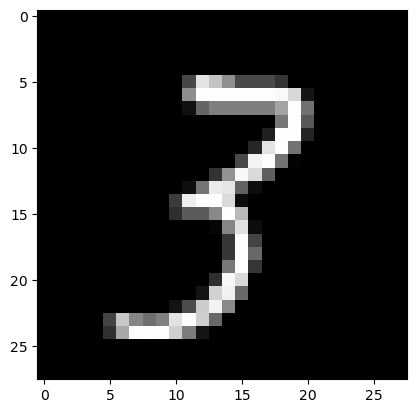

Prediction:  [3]
Label:  3


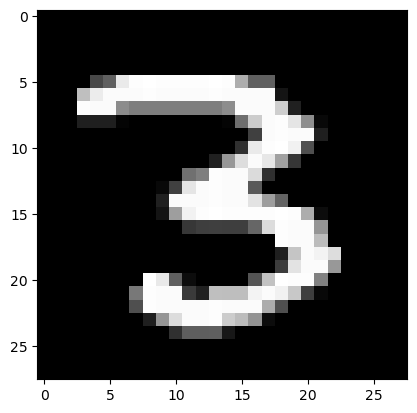

Prediction:  [6]
Label:  6


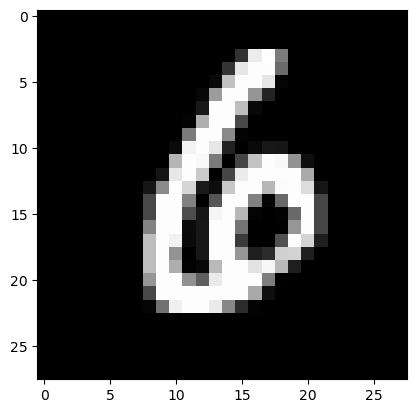

Prediction:  [1]
Label:  1


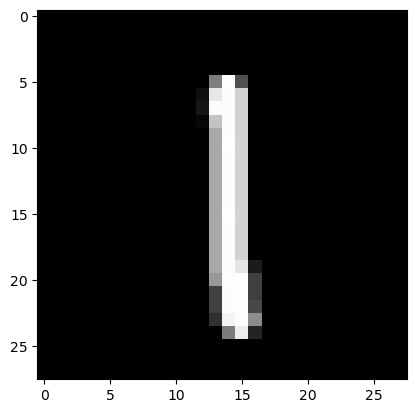

In [17]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(9, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(5, W1, b1, W2, b2)